In [83]:
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os
import yaml
import copy

import warnings
warnings.filterwarnings('ignore')

In [84]:
df = pd.read_csv('insurance_claims.csv')

In [85]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,?,Minor Damage,NaN,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [86]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [87]:
df.replace('?', np.nan, inplace = True)


In [88]:
df.shape

(1000, 40)

In [89]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted            91
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

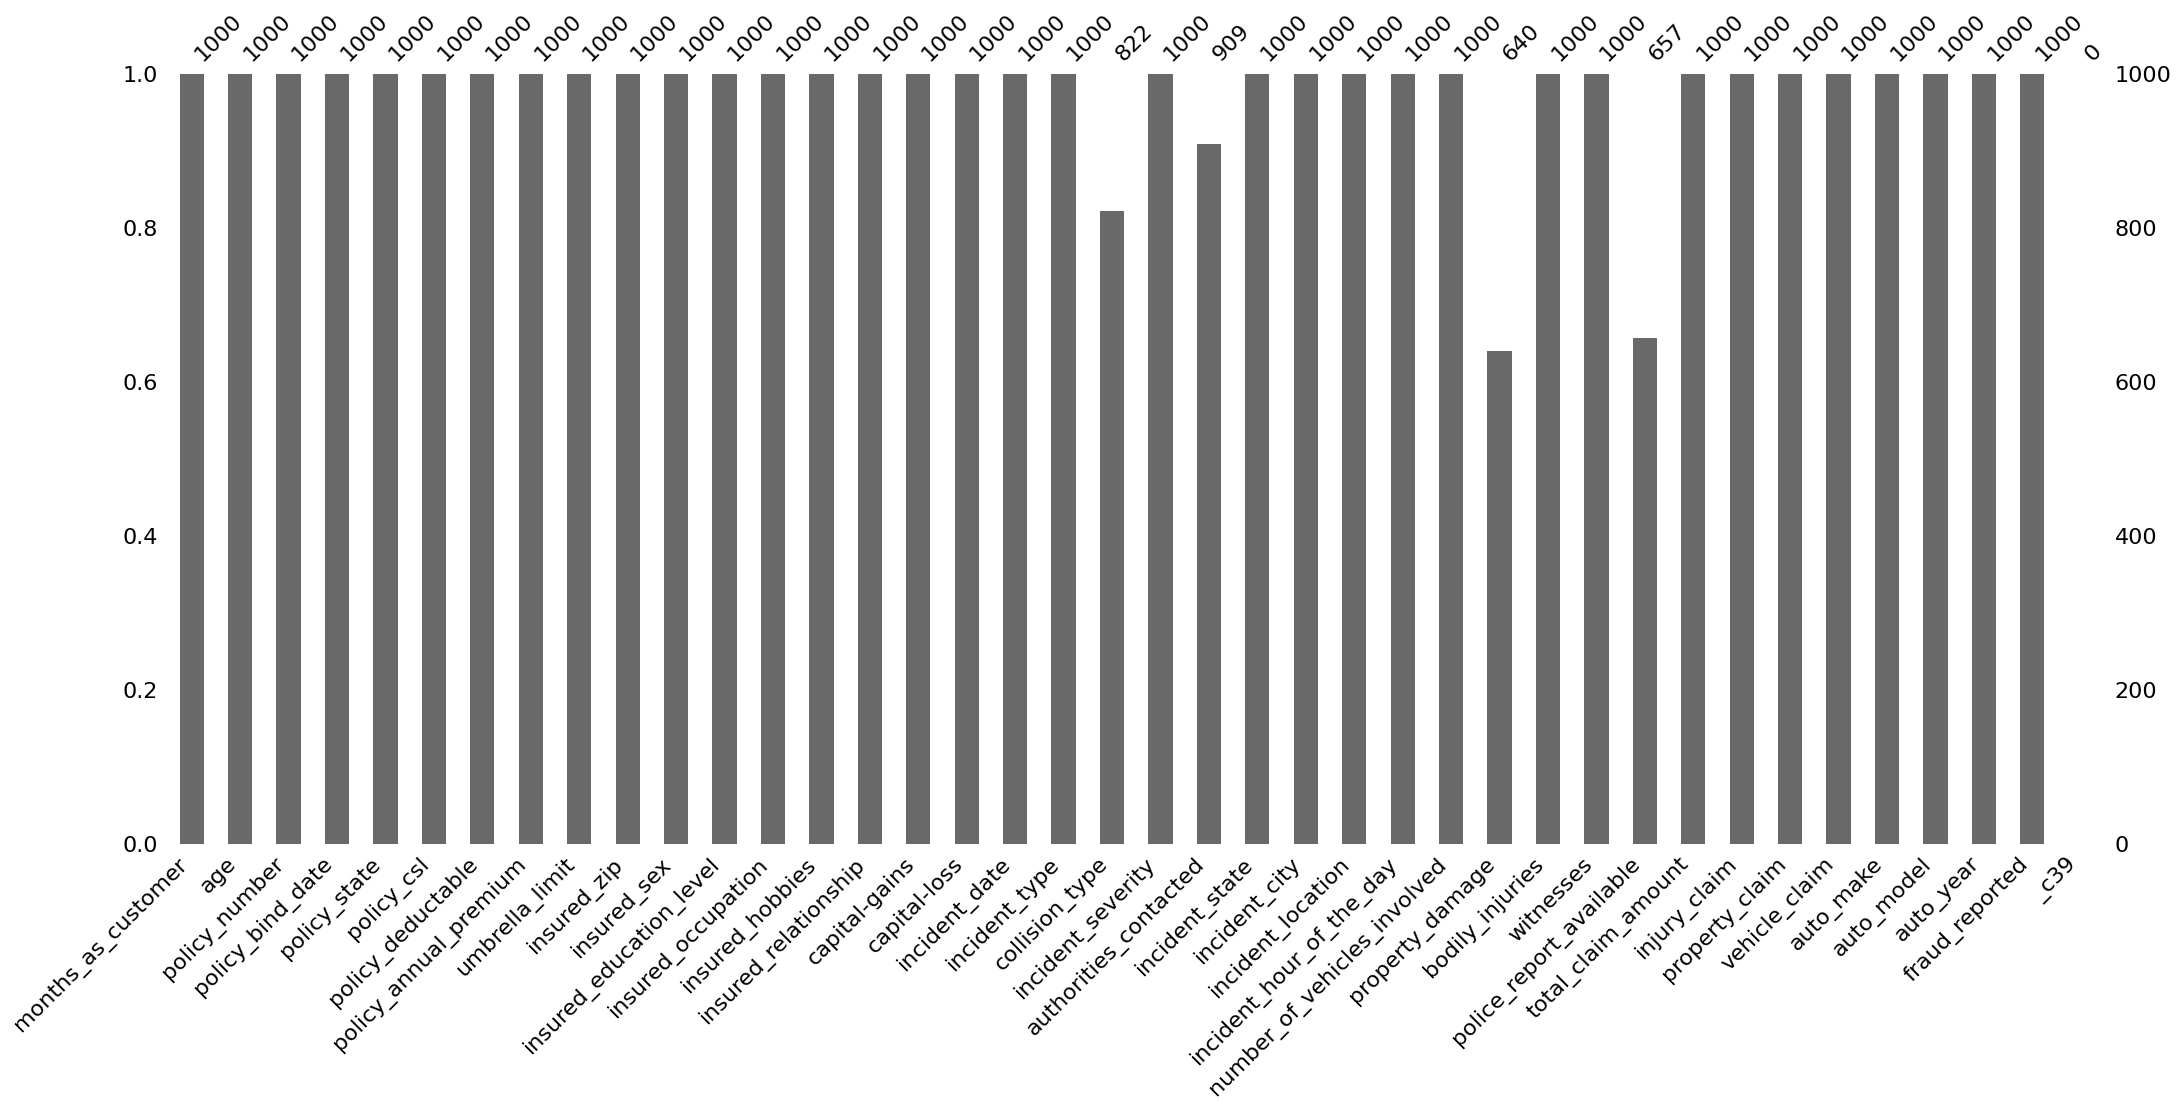

In [90]:
import missingno as msno

msno.bar(df)
plt.show()

In [91]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [92]:
cat_df = df.select_dtypes(include = ['object'])
num_df = df.select_dtypes(include = ['float64', 'int64'])



In [93]:
cat_df.head()

,policy_bind_date,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,property_damage,police_report_available,auto_make,auto_model,fraud_reported
0,2014-10-17,OH,250/500,MALE,MD,craft-repair,sleeping,husband,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,YES,YES,Saab,92x,Y
1,2006-06-27,IN,250/500,MALE,MD,machine-op-inspct,reading,other-relative,2015-01-21,Vehicle Theft,NaN,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,NaN,NaN,Mercedes,E400,Y
2,2000-09-06,OH,100/300,FEMALE,PhD,sales,board-games,own-child,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,NO,NO,Dodge,RAM,N
3,1990-05-25,IL,250/500,FEMALE,PhD,armed-forces,board-games,unmarried,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,NaN,NO,Chevrolet,Tahoe,Y
4,2014-06-06,IL,500/1000,MALE,Associate,sales,board-games,unmarried,2015-02-17,Vehicle Theft,NaN,Minor Damage,NaN,NY,Arlington,3041 3rd Ave,NO,NO,Accura,RSX,N


In [94]:
cat_df = cat_df.drop(['policy_bind_date', 'incident_date'], axis=1)

In [95]:
# printing unique values of each column
for col in cat_df.columns:
    print(f"{col}: \n{cat_df[col].unique()}\n")

policy_state: 
['OH' 'IN' 'IL']

policy_csl: 
['250/500' '100/300' '500/1000']

insured_sex: 
['MALE' 'FEMALE']

insured_education_level: 
['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']

insured_occupation: 
['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']

insured_hobbies: 
['sleeping' 'reading' 'board-games' 'bungie-jumping' 'base-jumping' 'golf'
 'camping' 'dancing' 'skydiving' 'movies' 'hiking' 'yachting' 'paintball'
 'chess' 'kayaking' 'polo' 'basketball' 'video-games' 'cross-fit'
 'exercise']

insured_relationship: 
['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family']

incident_type: 
['Single Vehicle Collision' 'Vehicle Theft' 'Multi-vehicle Collision'
 'Parked Car']

collision_type: 
['Side Collision' nan 'Rear Collision' 'Front Collision']

incident_sev

In [96]:
cat_df[['Pin_code', 'street']] = cat_df['incident_location'].str.extract(r'(^\d{4})(.*)')


In [98]:
cat_df['policy_state'], uniques = pd.factorize(cat_df['policy_state'])
cat_df['policy_csl'], uniques = pd.factorize(cat_df['policy_csl'])
cat_df['insured_sex'], uniques = pd.factorize(cat_df['insured_sex'])
cat_df['insured_education_level'], uniques = pd.factorize(cat_df['insured_education_level'])
cat_df['insured_occupation'], uniques = pd.factorize(cat_df['insured_occupation'])
cat_df['insured_hobbies'], uniques = pd.factorize(cat_df['insured_hobbies'])
cat_df['insured_relationship'], uniques = pd.factorize(cat_df['insured_relationship'])
cat_df['Pin_code'], uniques = pd.factorize(cat_df['Pin_code']) 
cat_df['auto_make'], uniques = pd.factorize(cat_df['auto_make'])
cat_df['incident_city'], uniques = pd.factorize(cat_df['incident_city'])
cat_df['fraud_reported'], uniques = pd.factorize(cat_df['fraud_reported'])
cat_df['auto_model'], uniques = pd.factorize(cat_df['auto_model'])
cat_df['property_damage'], uniques = pd.factorize(cat_df['property_damage'])
cat_df['police_report_available'], uniques = pd.factorize(cat_df['police_report_available'])
cat_df['incident_type'], uniques = pd.factorize(cat_df['incident_type'])
cat_df['collision_type'], uniques = pd.factorize(cat_df['collision_type'])
cat_df['incident_severity'], uniques = pd.factorize(cat_df['incident_severity'])


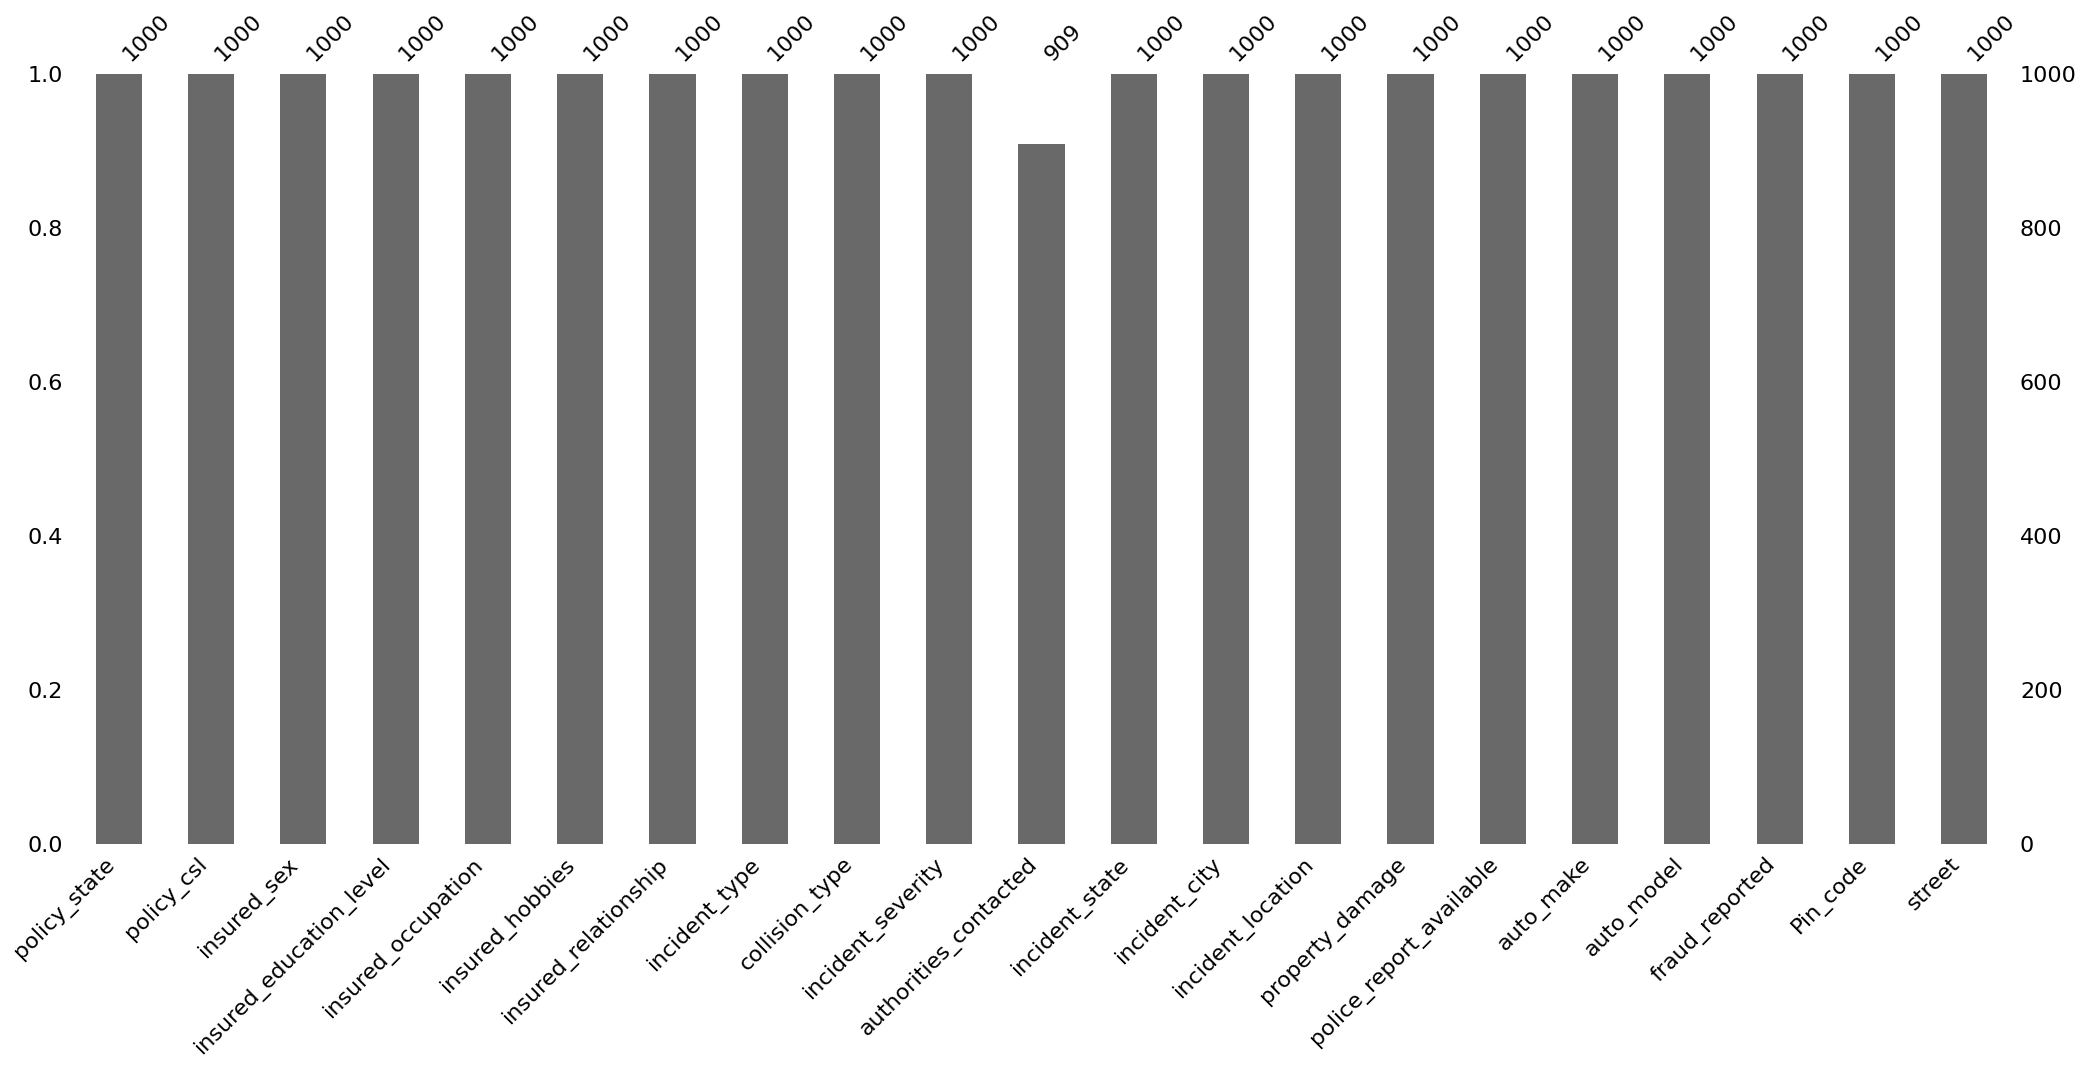

In [99]:
msno.bar(cat_df)
plt.show()

In [100]:
cat_df.police_report_available.unique()
cat_df['police_report_available'].value_counts()


police_report_available
-1    343
 1    343
 0    314
Name: count, dtype: int64

In [102]:

# Set display option to show all columns
pd.set_option('display.max_columns', None)


In [103]:
.head()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,property_damage,police_report_available,auto_make,auto_model,fraud_reported,Pin_code,street
0,328,48,521585,1000,1406.91,0,466132,53300,0,5,1,1,2,71610,6510,13020,52080,2004,NaN,0,0,0,0,0,0,0,0,0,0,Police,SC,0,9935 4th Drive,0,0,0,0,0,0,4th Drive
1,228,42,342868,2000,1197.22,5000000,468176,0,0,8,1,0,0,5070,780,780,3510,2007,NaN,1,0,0,0,1,1,1,1,-1,1,Police,VA,1,6608 MLK Hwy,-1,-1,1,1,0,1,MLK Hwy
2,134,29,687698,2000,1413.14,5000000,430632,35100,0,7,3,2,3,34650,7700,3850,23100,2007,NaN,0,1,1,1,2,2,2,2,1,1,Police,NY,0,7121 Francis Lane,1,1,2,2,1,2,Francis Lane
3,256,41,227811,2000,1415.74,6000000,608117,48900,-62400,5,1,1,2,63400,6340,6340,50720,2014,NaN,2,0,1,1,3,2,3,0,2,0,Police,OH,2,6956 Maple Drive,-1,1,3,3,0,3,Maple Drive
4,228,44,367455,1000,1583.91,6000000,610706,66000,-46000,20,1,0,1,6500,1300,650,4550,2009,NaN,2,2,0,2,2,2,3,1,-1,1,NaN,NY,2,3041 3rd Ave,1,1,4,4,1,4,3rd Ave


In [106]:
df_c= ['months_as_customer','age','policy_deductable','policy_annual_premium',
         'umbrella_limit','capital-gains','capital-loss', 'incident_hour_of_the_day','number_of_vehicles_involved', 'bodily_injuries','witnesses', 
         'total_claim_amount','injury_claim', 'property_claim','vehicle_claim', 'auto_year','policy_state', 'policy_csl','insured_sex',
         'insured_education_level','insured_occupation','insured_hobbies','insured_relationship','incident_type','collision_type','incident_severity',
         'incident_city','property_damage','police_report_available','auto_make','auto_model','fraud_reported','Pin_code']

In [111]:
print(type(df_c))
df_c = pd.DataFrame(df_c)  # convert list to DataFrame


<class 'list'>


In [114]:
print("Numeric columns:", df_c.select_dtypes(include=['int64', 'float64']).columns)
print("Shape of numeric data:", df_c.select_dtypes(include=['int64', 'float64']).shape)

corr = df_c.select_dtypes(include=['int64', 'float64']).corr()
print("Correlation matrix shape:", corr.shape)

if corr.empty:
    print("Correlation matrix is empty — check numeric columns and data.")
else:
    import seaborn as sns
    import matplotlib.pyplot as plt

    plt.figure(figsize=(12,8))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
    plt.title("Correlation Matrix Heatmap")
    plt.show()


Numeric columns: RangeIndex(start=0, stop=0, step=1)
Shape of numeric data: (33, 0)
Correlation matrix shape: (0, 0)
Correlation matrix is empty — check numeric columns and data.


In [117]:
# Convert columns that should be numeric but might be strings:
for col in df_c.columns:
    df_c[col] = pd.to_numeric(df_c[col], errors='ignore')  # or errors='coerce' to force NaN on errors

# Select numeric columns
num_only = df_c.select_dtypes(include=['int64', 'float64'])

# Check numeric columns
print("Numeric columns after conversion:", num_only.columns)

# Compute correlation matrix and plot heatmap
if not num_only.empty:
    corr = num_only.corr()
    import seaborn as sns
    import matplotlib.pyplot as plt

    plt.figure(figsize=(12,8))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
    plt.title("Correlation Matrix Heatmap")
    plt.show()
else:
    print("No numeric columns available to plot correlation.")


Numeric columns after conversion: RangeIndex(start=0, stop=0, step=1)
No numeric columns available to plot correlation.


In [116]:
df_c.dtypes

0    object
dtype: object

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns only
num_only = df_c.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr = num_only.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix Heatmap of df_c")
plt.show()


Numeric columns: RangeIndex(start=0, stop=0, step=1)
Shape of numeric data: (33, 0)
Correlation matrix shape: (0, 0)
Correlation matrix is empty — check numeric columns and data.
